Analysing football stats using the StatsBoomb API with Python

In [137]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

We extract the data of the competitions

In [98]:
pd.set_option('display.max.rows', None)
competiciones = sb.competitions()
competiciones.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882


Extract the data of the matches from the competition

In [4]:
partidos = sb.matches(55, 282)
partidos.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


We get the match id and then extract all the events from this match. In this case we want to analyze the UEFA Euro Final 2024

In [5]:
match_id = 3943043

In [6]:
final = sb.events(match_id)
final.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


Also we want the 360 data from StatsBomb to get a better analysis

In [7]:
final_360 = pd.read_json(f'C:/Users/Juan Carlos/Documents/GitHub/open-data2/data/three-sixty/{match_id}.json')
final_360.head()

,event_uuid,visible_area,freeze_frame
0,152820f0-6ca9-4df3-943b-a67d568ff472,"[76.727979231533, 80.0, 43.48260274825104, 80....","[{'teammate': True, 'actor': False, 'keeper': ..."
1,d64668c7-747c-4a7d-912c-e1c3ff357a67,"[74.17155381327908, 80.0, 35.886645019859955, ...","[{'teammate': True, 'actor': True, 'keeper': T..."
2,9c107df3-a3c8-4ad5-bc35-00214087a105,"[74.17155381327908, 80.0, 35.886645019859955, ...","[{'teammate': True, 'actor': True, 'keeper': T..."
3,237201b8-aef8-4823-b282-e82875795c07,"[74.94591967619755, 80.0, 38.94205367100787, 8...","[{'teammate': True, 'actor': True, 'keeper': T..."
4,238f44cb-0f18-4217-85b5-8cc6345278fe,"[0.0, 80.0, 0.0, 38.712810429656, 21.650088719...","[{'teammate': True, 'actor': True, 'keeper': T..."


In [99]:
final['id'].head()

0    50aa204f-5d65-4145-8597-5d5628fb7898
1    a279cbee-9ab3-4cfb-9c51-27cacc1bf2a2
2    d2126e70-9f04-4bb7-ba2b-9377836d1757
3    54d78bfa-4146-42bd-acdc-97bcd393dd81
4    7230470a-8ceb-4eb8-a66f-d72a2afb12d6
Name: id, dtype: object

In [32]:
final_360['event_uuid'].head()

0    152820f0-6ca9-4df3-943b-a67d568ff472
1    d64668c7-747c-4a7d-912c-e1c3ff357a67
2    9c107df3-a3c8-4ad5-bc35-00214087a105
3    237201b8-aef8-4823-b282-e82875795c07
4    238f44cb-0f18-4217-85b5-8cc6345278fe
Name: event_uuid, dtype: object

In [34]:
final_360.iloc[2]['freeze_frame']

[{'teammate': True,
  'actor': True,
  'keeper': True,
  'location': [25.399999618530273, 38.79999923706055]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [46.7156452142596, 47.30318012073257]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [47.28100150433741, 37.443716495726484]},
 {'teammate': False,
  'actor': False,
  'keeper': False,
  'location': [51.00379518159081, 46.88810816073167]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [53.56317029077824, 26.000263426446693]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [57.21883354478981, 58.48223256613411]},
 {'teammate': False,
  'actor': False,
  'keeper': False,
  'location': [58.4013204229155, 33.77840263069717]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [60.5976688686181, 48.04111078196234]},
 {'teammate': False,
  'actor': False,
  'keeper': False,
  'location': [61.183823007097075, 21.03179318

Now we make a left join to get a dataframe that makes the union of the 360 dataframe and the events dataset

In [11]:
final_df = pd.merge(left=final, right=final_360, left_on='id', right_on='event_uuid', how='left')
final_df.head()
final_df.to_csv('D:/Ciencia de datos/Proyectos/Proyecto/Original Data/final_euro_df.csv')

In [12]:
final_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

In [13]:
final_df['period'].unique()

array([1, 2], dtype=int64)

In [14]:
final_df['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Block', 'Dispossessed', 'Duel',
       'Dribble', 'Ball Recovery', 'Clearance', 'Interception',
       'Dribbled Past', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Injury Stoppage', 'Referee Ball-Drop', '50/50',
       'Half End', 'Substitution', 'Shield', 'Tactical Shift', 'Error'],
      dtype=object)

In [15]:
final_df['player'].unique()

array([nan, 'Kobbie Mainoo', 'Jordan Pickford', 'Unai Simón Mendibil',
       'Robin Aime Robert Le Normand', 'Daniel Carvajal Ramos',
       'Álvaro Borja Morata Martín', 'Daniel Olmo Carvajal',
       'Jude Bellingham', 'Rodrigo Hernández Cascante', 'Aymeric Laporte',
       'Luke Shaw', 'Declan Rice', 'Marc Guehi', 'Phil Foden',
       'Kyle Walker', 'Lamine Yamal Nasraoui Ebana',
       'Marc Cucurella Saseta', 'Nicholas Williams Arthuer', 'Harry Kane',
       'Bukayo Saka', 'Fabián Ruiz Peña', 'John Stones',
       'Martín Zubimendi Ibáñez', 'Cole Palmer', 'Mikel Oyarzabal Ugarte',
       'José Ignacio Fernández Iglesias', 'Ollie Watkins', 'Ivan Toney',
       'Mikel Merino Zazón'], dtype=object)

Now, we gonna make an exercise to know all the data from the passes that a singular player did in this match. By changing the variable 'name' we can get the data from any player that plays the final

In [401]:
name = 'Declan Rice'
tipo = 'Pass'

name_df = final_df[(final_df['player'] == name) & (final_df['type'] == tipo)].reset_index(drop=True)
name_df.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,England,768,00:01:33.965,Pass,True,01a841b4-4a1a-4abb-91ac-62047bb63384,"[22.16467614885438, 67.27518968904599, 0.0, 21...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,England,768,00:02:17.280,Pass,NaN,11c7481c-4526-414f-93c1-d7435bc5bab8,"[45.892679732231265, 55.93102388297325, 34.039...","[{'teammate': True, 'actor': False, 'keeper': ..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,England,768,00:07:17.581,Pass,True,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,England,768,00:08:31.650,Pass,NaN,c6a04893-55f4-41b5-b3d8-91cd222ebac3,"[47.49243359861999, 76.35146357338292, 34.1296...","[{'teammate': True, 'actor': False, 'keeper': ..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,England,768,00:09:28.269,Pass,NaN,a0526ed4-95da-404d-b7b0-d60a8b368317,"[59.17437423548751, 61.30432304355175, 59.0730...","[{'teammate': False, 'actor': False, 'keeper':..."


In [402]:
name_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

The next cells are some data transformation to work better later

In [403]:
name_df = pd.DataFrame(name_df)

name_df_location = name_df['location']

name_df_location

0     [21.0, 24.9]
1      [55.4, 8.3]
2      [3.0, 73.6]
3     [56.9, 49.1]
4     [69.3, 17.9]
5     [72.1, 54.4]
6     [45.9, 32.4]
7     [67.2, 21.2]
8     [76.4, 49.9]
9     [75.0, 55.4]
10     [82.5, 6.8]
11     [73.9, 6.8]
12    [56.6, 21.8]
13    [15.7, 42.6]
14    [54.4, 65.4]
15    [27.9, 22.7]
16    [42.1, 21.0]
17    [91.1, 62.7]
18    [27.6, 58.7]
19    [44.7, 14.8]
20    [63.6, 30.1]
21    [50.0, 23.7]
22    [47.6, 47.6]
23    [82.2, 42.9]
24    [70.4, 33.4]
25    [85.8, 54.1]
26     [34.8, 3.1]
27     [5.1, 14.8]
28    [72.5, 13.8]
29    [21.4, 51.6]
30    [39.7, 35.1]
31    [78.3, 49.0]
32    [87.2, 44.6]
33    [63.3, 27.0]
34    [58.4, 70.7]
35    [62.0, 48.2]
36    [36.9, 36.6]
37    [60.6, 58.7]
38    [53.1, 70.1]
39    [37.2, 75.1]
40    [35.1, 32.1]
41    [46.2, 37.7]
Name: location, dtype: object

In [404]:
name_df_location = pd.DataFrame(name_df_location)

name_df_location

,location
0,"[21.0, 24.9]"
1,"[55.4, 8.3]"
2,"[3.0, 73.6]"
3,"[56.9, 49.1]"
4,"[69.3, 17.9]"
5,"[72.1, 54.4]"
6,"[45.9, 32.4]"
7,"[67.2, 21.2]"
8,"[76.4, 49.9]"
9,"[75.0, 55.4]"


In [405]:
name_df_location[['x_start', 'y_start']] = pd.DataFrame(name_df_location['location'].tolist(), index=name_df_location.index)
name_df_location[['x_start', 'y_start']]

,x_start,y_start
0,21.0,24.9
1,55.4,8.3
2,3.0,73.6
3,56.9,49.1
4,69.3,17.9
5,72.1,54.4
6,45.9,32.4
7,67.2,21.2
8,76.4,49.9
9,75.0,55.4


In [406]:
name_df_end = name_df['pass_end_location']
name_df_end

0      [30.0, 22.7]
1      [86.4, 13.4]
2       [5.1, 73.6]
3      [58.2, 52.7]
4       [72.8, 8.8]
5      [56.6, 45.2]
6      [50.9, 56.7]
7      [76.4, 21.6]
8      [83.4, 47.6]
9      [90.4, 52.7]
10      [90.9, 8.8]
11     [79.4, 14.3]
12     [55.6, 43.6]
13      [4.4, 58.2]
14     [63.8, 73.9]
15     [43.2, 20.5]
16     [48.3, 12.0]
17    [111.1, 37.4]
18     [38.1, 10.9]
19     [40.8, 51.5]
20     [78.7, 10.4]
21      [56.5, 7.0]
22     [50.9, 66.6]
23     [83.6, 26.3]
24     [72.9, 49.8]
25     [92.0, 59.6]
26      [41.7, 4.0]
27     [38.1, 25.9]
28     [56.5, 22.0]
29     [24.5, 77.6]
30     [47.6, 37.0]
31     [70.1, 30.6]
32     [83.9, 35.4]
33     [66.4, 44.1]
34     [28.6, 40.4]
35     [54.2, 51.5]
36     [32.9, 50.7]
37     [74.0, 72.0]
38     [42.6, 60.7]
39     [33.6, 79.0]
40     [34.8, 19.5]
41     [72.2, 52.4]
Name: pass_end_location, dtype: object

In [407]:
name_df_end = pd.DataFrame(name_df_end)
name_df_end

,pass_end_location
0,"[30.0, 22.7]"
1,"[86.4, 13.4]"
2,"[5.1, 73.6]"
3,"[58.2, 52.7]"
4,"[72.8, 8.8]"
5,"[56.6, 45.2]"
6,"[50.9, 56.7]"
7,"[76.4, 21.6]"
8,"[83.4, 47.6]"
9,"[90.4, 52.7]"


In [408]:
name_df_end[['x_end', 'y_end']] = pd.DataFrame(name_df_end['pass_end_location'].tolist(), index=name_df_end.index)
name_df_end[['x_end', 'y_end']]

,x_end,y_end
0,30.0,22.7
1,86.4,13.4
2,5.1,73.6
3,58.2,52.7
4,72.8,8.8
5,56.6,45.2
6,50.9,56.7
7,76.4,21.6
8,83.4,47.6
9,90.4,52.7


In [409]:
location_df_1 = name_df['location'][name_df['period'] == 1]

location_df_1

0     [21.0, 24.9]
1      [55.4, 8.3]
2      [3.0, 73.6]
3     [56.9, 49.1]
4     [69.3, 17.9]
5     [72.1, 54.4]
6     [45.9, 32.4]
7     [67.2, 21.2]
8     [76.4, 49.9]
9     [75.0, 55.4]
10     [82.5, 6.8]
11     [73.9, 6.8]
12    [56.6, 21.8]
13    [15.7, 42.6]
14    [54.4, 65.4]
15    [27.9, 22.7]
16    [42.1, 21.0]
17    [91.1, 62.7]
Name: location, dtype: object

In [410]:
location_df_1 = pd.DataFrame(location_df_1)
location_df_1

,location
0,"[21.0, 24.9]"
1,"[55.4, 8.3]"
2,"[3.0, 73.6]"
3,"[56.9, 49.1]"
4,"[69.3, 17.9]"
5,"[72.1, 54.4]"
6,"[45.9, 32.4]"
7,"[67.2, 21.2]"
8,"[76.4, 49.9]"
9,"[75.0, 55.4]"


In [411]:
location_df_2 = name_df['location'][name_df['period'] == 2]
location_df_2

18    [27.6, 58.7]
19    [44.7, 14.8]
20    [63.6, 30.1]
21    [50.0, 23.7]
22    [47.6, 47.6]
23    [82.2, 42.9]
24    [70.4, 33.4]
25    [85.8, 54.1]
26     [34.8, 3.1]
27     [5.1, 14.8]
28    [72.5, 13.8]
29    [21.4, 51.6]
30    [39.7, 35.1]
31    [78.3, 49.0]
32    [87.2, 44.6]
33    [63.3, 27.0]
34    [58.4, 70.7]
35    [62.0, 48.2]
36    [36.9, 36.6]
37    [60.6, 58.7]
38    [53.1, 70.1]
39    [37.2, 75.1]
40    [35.1, 32.1]
41    [46.2, 37.7]
Name: location, dtype: object

In [412]:
location_df_2 = pd.DataFrame(location_df_2)
location_df_2

,location
18,"[27.6, 58.7]"
19,"[44.7, 14.8]"
20,"[63.6, 30.1]"
21,"[50.0, 23.7]"
22,"[47.6, 47.6]"
23,"[82.2, 42.9]"
24,"[70.4, 33.4]"
25,"[85.8, 54.1]"
26,"[34.8, 3.1]"
27,"[5.1, 14.8]"


In [413]:
location_df_1[['x_start', 'y_start']] = pd.DataFrame(location_df_1['location'].tolist(), index=location_df_1.index)
location_df_1[['x_start', 'y_start']]

,x_start,y_start
0,21.0,24.9
1,55.4,8.3
2,3.0,73.6
3,56.9,49.1
4,69.3,17.9
5,72.1,54.4
6,45.9,32.4
7,67.2,21.2
8,76.4,49.9
9,75.0,55.4


In [414]:
location_df_2[['x_start', 'y_start']] = pd.DataFrame(location_df_2['location'].tolist(), index=location_df_2.index)
location_df_2[['x_start', 'y_start']]

,x_start,y_start
18,27.6,58.7
19,44.7,14.8
20,63.6,30.1
21,50.0,23.7
22,47.6,47.6
23,82.2,42.9
24,70.4,33.4
25,85.8,54.1
26,34.8,3.1
27,5.1,14.8


In [415]:
end_location_df_1 = name_df['pass_end_location'][name_df['period'] == 1]
end_location_df_1

0      [30.0, 22.7]
1      [86.4, 13.4]
2       [5.1, 73.6]
3      [58.2, 52.7]
4       [72.8, 8.8]
5      [56.6, 45.2]
6      [50.9, 56.7]
7      [76.4, 21.6]
8      [83.4, 47.6]
9      [90.4, 52.7]
10      [90.9, 8.8]
11     [79.4, 14.3]
12     [55.6, 43.6]
13      [4.4, 58.2]
14     [63.8, 73.9]
15     [43.2, 20.5]
16     [48.3, 12.0]
17    [111.1, 37.4]
Name: pass_end_location, dtype: object

In [416]:
end_location_df_1 = pd.DataFrame(end_location_df_1)
end_location_df_1

,pass_end_location
0,"[30.0, 22.7]"
1,"[86.4, 13.4]"
2,"[5.1, 73.6]"
3,"[58.2, 52.7]"
4,"[72.8, 8.8]"
5,"[56.6, 45.2]"
6,"[50.9, 56.7]"
7,"[76.4, 21.6]"
8,"[83.4, 47.6]"
9,"[90.4, 52.7]"


In [417]:
end_location_df_1[['x_end', 'y_end']] = pd.DataFrame(end_location_df_1['pass_end_location'].tolist(), index=end_location_df_1.index)
end_location_df_1[['x_end', 'y_end']]

,x_end,y_end
0,30.0,22.7
1,86.4,13.4
2,5.1,73.6
3,58.2,52.7
4,72.8,8.8
5,56.6,45.2
6,50.9,56.7
7,76.4,21.6
8,83.4,47.6
9,90.4,52.7


In [418]:
end_location_df_2 = name_df['pass_end_location'][name_df['period'] == 2]
end_location_df_2

18    [38.1, 10.9]
19    [40.8, 51.5]
20    [78.7, 10.4]
21     [56.5, 7.0]
22    [50.9, 66.6]
23    [83.6, 26.3]
24    [72.9, 49.8]
25    [92.0, 59.6]
26     [41.7, 4.0]
27    [38.1, 25.9]
28    [56.5, 22.0]
29    [24.5, 77.6]
30    [47.6, 37.0]
31    [70.1, 30.6]
32    [83.9, 35.4]
33    [66.4, 44.1]
34    [28.6, 40.4]
35    [54.2, 51.5]
36    [32.9, 50.7]
37    [74.0, 72.0]
38    [42.6, 60.7]
39    [33.6, 79.0]
40    [34.8, 19.5]
41    [72.2, 52.4]
Name: pass_end_location, dtype: object

In [419]:
end_location_df_2 = pd.DataFrame(end_location_df_2)
end_location_df_2

,pass_end_location
18,"[38.1, 10.9]"
19,"[40.8, 51.5]"
20,"[78.7, 10.4]"
21,"[56.5, 7.0]"
22,"[50.9, 66.6]"
23,"[83.6, 26.3]"
24,"[72.9, 49.8]"
25,"[92.0, 59.6]"
26,"[41.7, 4.0]"
27,"[38.1, 25.9]"


In [420]:
end_location_df_2[['x_end', 'y_end']] = pd.DataFrame(end_location_df_2['pass_end_location'].tolist(), index=end_location_df_2.index)
end_location_df_2[['x_end', 'y_end']]

,x_end,y_end
18,38.1,10.9
19,40.8,51.5
20,78.7,10.4
21,56.5,7.0
22,50.9,66.6
23,83.6,26.3
24,72.9,49.8
25,92.0,59.6
26,41.7,4.0
27,38.1,25.9


And to end this exercise, three graphics to see all the passes from this player in the first half, the second half and a graphic to see the context of one pass that allows us to understand if that pass was a good decision or not

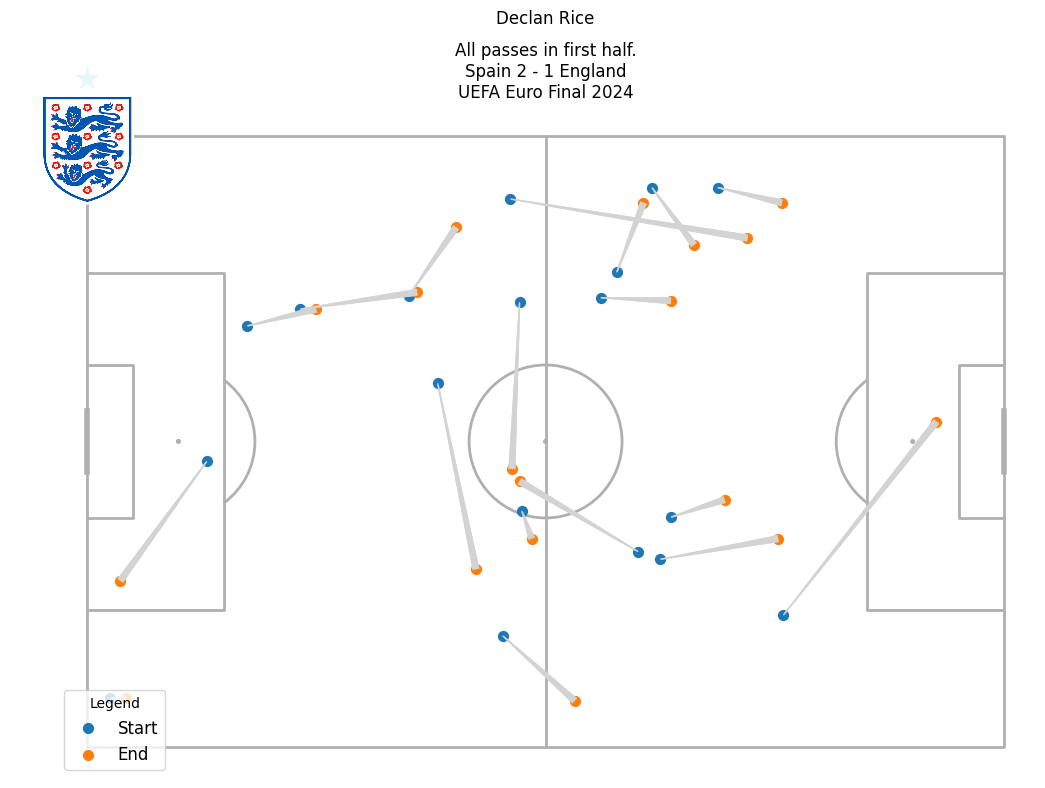

In [421]:
pitch1 = Pitch(pitch_type='statsbomb')

fig, ax = pitch1.draw(figsize=(12, 8))

spain = 'españa.png'  # Reemplaza con la ruta de tu imagen
england = 'inglaterra.png'

# Leer la imagen
spain_img = mpimg.imread(spain)
england_img = mpimg.imread(england)

plt.title('All passes in first half.\n' + 'Spain 2 - 1 England\n' + 'UEFA Euro Final 2024')
plt.suptitle(name)



if name_df.iloc[0]['team'] == 'Spain':
    imagebox = OffsetImage(spain_img, zoom=0.2)  # Ajusta el zoom para el tamaño de la imagen
    ab = AnnotationBbox(imagebox, (0, 0), frameon=False)  # Ajusta la posición de la imagen (fuera del campo)
    ax.add_artist(ab)
else:
    imagebox = OffsetImage(england_img, zoom=0.2)  # Ajusta el zoom para el tamaño de la imagen
    ab = AnnotationBbox(imagebox, (0, 0), frameon=False)  # Ajusta la posición de la imagen (fuera del campo)
    ax.add_artist(ab)
    

first_half_start = pitch1.scatter(x=location_df_1['x_start'], y=location_df_1['y_start'], ax=ax, label='Start', s=50)

first_half_end = pitch1.scatter(x=end_location_df_1['x_end'], y=end_location_df_1['y_end'], ax=ax, label='End', s=50)

pitch1.lines(xstart=location_df_1['x_start'], ystart=location_df_1['y_start'], xend=end_location_df_1['x_end'], yend=end_location_df_1['y_end'], ax=ax, comet=True, color='lightgray')

plt.legend(loc='lower left', fontsize='large', title='Legend')

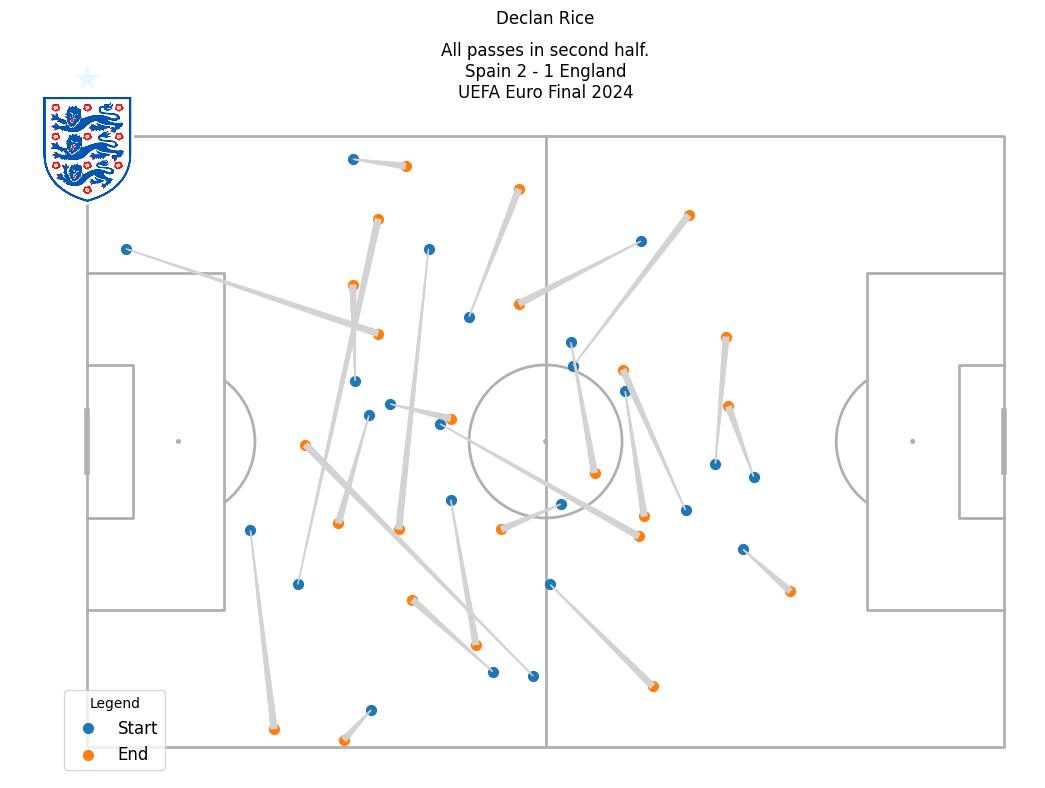

In [422]:
pitch2 = Pitch(pitch_type='statsbomb')

fig, ax = pitch2.draw(figsize=(12, 8))

spain = 'españa.png'  # Reemplaza con la ruta de tu imagen
england = 'inglaterra.png'

# Leer la imagen
spain_img = mpimg.imread(spain)
england_img = mpimg.imread(england)

plt.title('All passes in second half.\n' + 'Spain 2 - 1 England\n' + 'UEFA Euro Final 2024')
plt.suptitle(name)

if name_df.iloc[0]['team'] == 'Spain':
    imagebox = OffsetImage(spain_img, zoom=0.2)  # Ajusta el zoom para el tamaño de la imagen
    ab = AnnotationBbox(imagebox, (0, 0), frameon=False)  # Ajusta la posición de la imagen (fuera del campo)
    ax.add_artist(ab)
else:
    imagebox = OffsetImage(england_img, zoom=0.2)  # Ajusta el zoom para el tamaño de la imagen
    ab = AnnotationBbox(imagebox, (0, 0), frameon=False)  # Ajusta la posición de la imagen (fuera del campo)
    ax.add_artist(ab)

second_half_start = pitch2.scatter(x=location_df_2['x_start'], y=location_df_2['y_start'], ax=ax, label='Start', s=50)

second_half_end = pitch2.scatter(x=end_location_df_2['x_end'], y=end_location_df_2['y_end'], ax=ax, label='End', s=50)

pitch1.lines(xstart=location_df_2['x_start'], ystart=location_df_2['y_start'], xend=end_location_df_2['x_end'], yend=end_location_df_2['y_end'], ax=ax, comet=True, color='lightgray')

plt.legend(loc='lower left', fontsize='large', title='Legend')

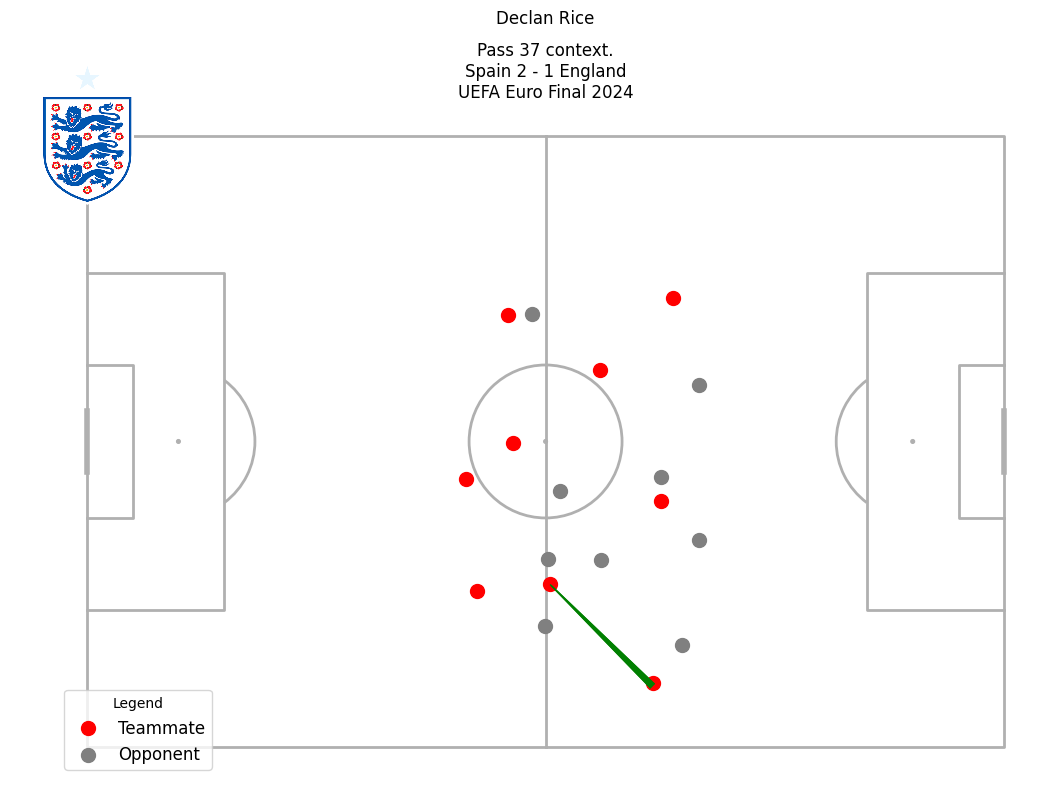

In [436]:
pitch = Pitch(pitch_type='statsbomb')

fig, ax = pitch.draw(figsize=(12,8))


number_pass = 37

spain = 'españa.png'  # Reemplaza con la ruta de tu imagen
england = 'inglaterra.png'

# Leer la imagen
spain_img = mpimg.imread(spain)
england_img = mpimg.imread(england)

plt.title(tipo + ' ' + str(number_pass) + ' context.\n' + 'Spain 2 - 1 England\n' + 'UEFA Euro Final 2024')
plt.suptitle(name)


if name_df.iloc[0]['team'] == 'Spain':
    imagebox = OffsetImage(spain_img, zoom=0.2)  # Ajusta el zoom para el tamaño de la imagen
    ab = AnnotationBbox(imagebox, (0, 0), frameon=False)  # Ajusta la posición de la imagen (fuera del campo)
    ax.add_artist(ab)
else:
    imagebox = OffsetImage(england_img, zoom=0.2)  # Ajusta el zoom para el tamaño de la imagen
    ab = AnnotationBbox(imagebox, (0, 0), frameon=False)  # Ajusta la posición de la imagen (fuera del campo)
    ax.add_artist(ab)


unique_labels = {}

for x in name_df.iloc[number_pass]['freeze_frame']:
    if x['teammate']:
        color = 'red'
        label = 'Teammate'
    else:
        color = 'gray'
        label = 'Opponent'

    players = pitch.scatter(x=x['location'][0], y=x['location'][1], ax=ax, c=color, s=100, label=label)

    if label not in unique_labels:
        unique_labels[label] = players
    
pitch.lines(xstart=name_df_location.iloc[number_pass]['x_start'], ystart=name_df_location.iloc[number_pass]['y_start'], xend=name_df_end.iloc[number_pass]['x_end'], yend=name_df_end.iloc[number_pass]['y_end'], ax=ax, color='green', comet=True)

plt.legend(handles=unique_labels.values(), loc='lower left', fontsize='large', title='Legend')